In [2]:
import matplotlib.pyplot as plt
import numpy as np
from casino import SimCasino, CasinoAnnealer

# Simular para los apartados a, b y c
# a) ¿qué proporción de noches a lo largo de un mes se ha retirado por quedarse sin dinero?
# b) ¿Cuál es el número de fichas con las que ha finalizado las noches de ese mes y cómo se distribuye (representar el histograma)? 
# c) ¿cuál  es  el  número  medio  de  partidas  jugadas  antes  de  retirarse  por quedarse sin dinero?
def apartados_abc(n_simulaciones = 5000, probs_jugadas=[1/7]*7):
    sim = SimCasino(probs_jugadas=probs_jugadas)
    a, b, c = sim.simular(n_simulaciones=n_simulaciones)
    print(f'Apartado a)\n\tProporción días bancarrota:  {a}')
    print(f'Apartado b)\n\tDistribución de fichas al final día:')
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,2])
    ax.bar(list(range(sim.max_fichas + 35)),b, width=1, color = 'b', edgecolor='r')
    # ax.set_xticks([0] + list(filter(lambda z: z, [x if y > 0 else 0 for x, y in enumerate(b)])))
    plt.xlim([min(np.where(b != 0)[0]) - 1, max(np.where(b != 0)[0]) + 1])
    plt.show()
    print(f'Apartado c)\n\tPartidas medias antes de bancarrota:  {c}')
    mean = sum([x*y for x, y in enumerate(b/sim.n_dias)])
    print(f'Número medio de fichas de cada noche: {mean}')
    std = np.sqrt(sum([((x-mean)**2)*y for x, y in enumerate(b)])/(sim.n_dias - 1))
    print(f'Desviación estandar de fichas de la simulación: {std}')

Apartado a)
	Proporción días bancarrota:  0.11794666666666971
Apartado b)
	Distribución de fichas al final día:


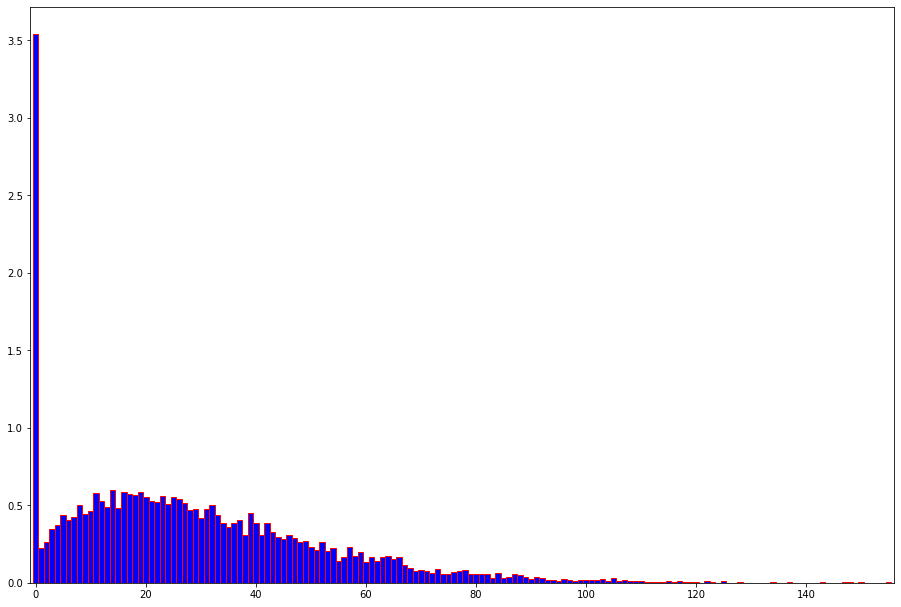

Apartado c)
	Partidas medias antes de bancarrota:  41.248769101943644
Número medio de fichas de cada noche: 28.39091999999998
Desviación estandar de fichas de la simulación: 23.556170468147275


In [4]:
apartados_abc(5000, [1/7]*7)

In [3]:
# Simular el apartado d
# Si  analizamos  el  problema  a  largo  plazo,  jugando  partidas
# indefinidamente,  y empezando con 30 fichas ¿cuál es la probabilidad de que
# me quede sin dinero? ¿y la de que termine con 150 fichas?
sim = SimCasino(n_dias=1, max_partidas=np.inf, max_fichas=150)
a, b, c = sim.simular(n_simulaciones=50000)
print(f'Probabilidad bancarrota:  {a}')
print(f'Probabilidad terminar con 150 fichas o más:  {1-a}')

Probabilidad bancarrota:  0.86046
Probabilidad terminar con 150 fichas o más:  0.13954


# Estimar hiperparámetros

In [5]:
casino = CasinoAnnealer(n_simulaciones=1000)
schedule = casino.auto(minutes=10, steps=10)
print(schedule)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.17000        -29.54    20.00%     0.00%     0:15:32   181:58:16
{'tmax': 1.3, 'tmin': 0.17, 'steps': 45, 'updates': 100}


In [6]:
casino = CasinoAnnealer(n_simulaciones=10000)
schedule = casino.auto(minutes=10, steps=10)
print(schedule)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.04500        -28.88     0.00%     0.00%     5:26:37  1685:06:51
{'tmax': 2.5, 'tmin': 0.045, 'steps': 4, 'updates': 100}


In [7]:
casino = CasinoAnnealer(n_simulaciones=1000)
schedule = casino.auto(minutes=10, steps=100)
print(schedule)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.00001        -29.95     0.00%     0.00%    12:52:47   140:24:54
{'tmax': 16.0, 'tmin': 1.1e-05, 'steps': 54, 'updates': 100}


## Lanzar recocido simulado

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     7.33111        -28.56   100.00%    40.00%     9:27:39   156:31:04

Mejores probabilidades: [0.08717335066661723, 0.11555217869321617, 0.10595468322127799, 0.14673535656447118, 0.08412569082725199, 0.16701137397450236, 0.29344736605266314]
Fichas medias: 29.09506666666666
Nº epochs 288


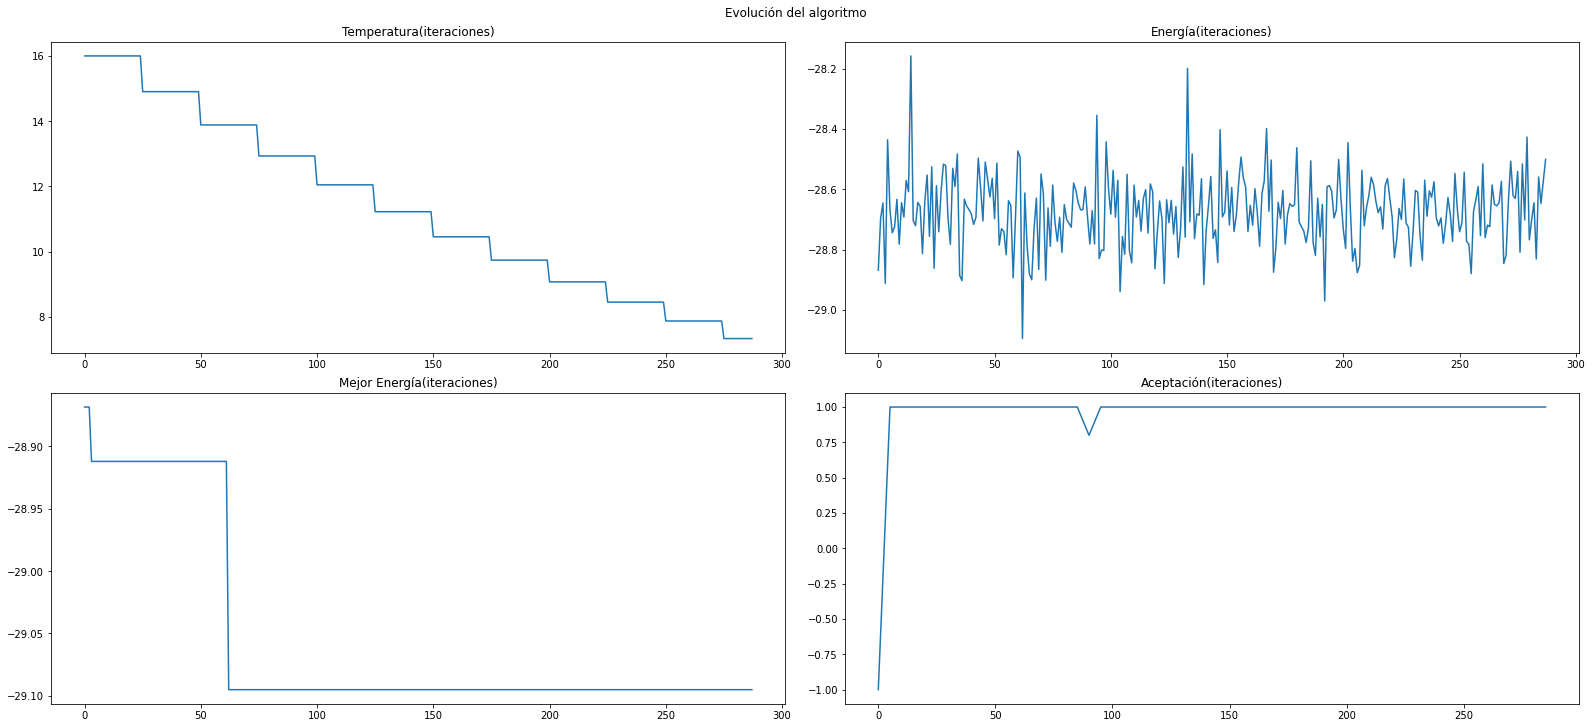

In [1]:
from casino import SimCasino, CasinoAnnealer

ann = CasinoAnnealer(n_simulaciones=7500, T_config={'L': 25}, stop_config={'p_acc': 1/100, 'k': 4})
ann.Tmax = 16.0
ann.Tmin = 1.1e-05
ann.steps = 5000
ann.updates = 1000
best_sol, best_cost = ann.anneal()
print(f'Mejores probabilidades: {list(best_sol)}')
print(f'Fichas medias: {-best_cost}')
print(f'Nº epochs {ann.epochs}')
ann.plot_evolution()

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.71506        -28.56   100.00%    80.00%    11:45:17    78:39:57

Mejores probabilidades: [0.01509146 0.08188401 0.18318086 0.20473296 0.25181767 0.03727295
 0.22602011]
Fichas medias: 29.10892000000003
Nº epochs 650


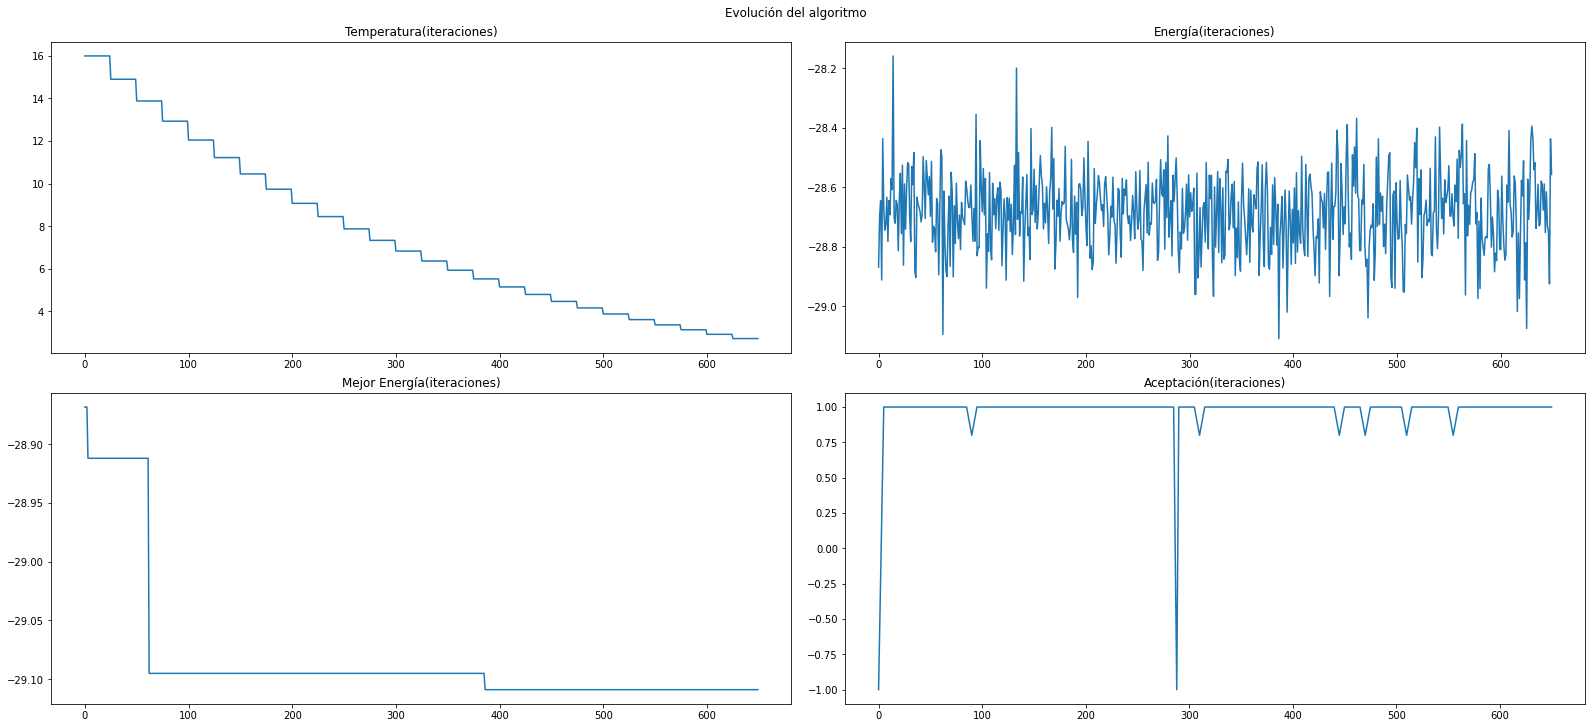

In [1]:
from casino import SimCasino, CasinoAnnealer
import pickle

with open('2021-12-03T10h21m31s.state', 'rb') as fh:
    ann = pickle.load(fh)
best_sol, best_cost = ann.resume_anneal(ann.epochs)
print(f'Mejores probabilidades: {list(best_sol)}')
print(f'Fichas medias: {-best_cost}')
print(f'Nº epochs {ann.epochs}')
ann.plot_evolution()

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.30099        -28.72    80.00%    40.00%    10:51:37    27:30:54

Mejores probabilidades: [0.052579783159149227, 0.1104488927855413, 0.08422184453523673, 0.4891158247584573, 0.028976867978351965, 0.04313225444828354, 0.19152453233497996]
Fichas medias: 29.137959999999996
Nº epochs 1416


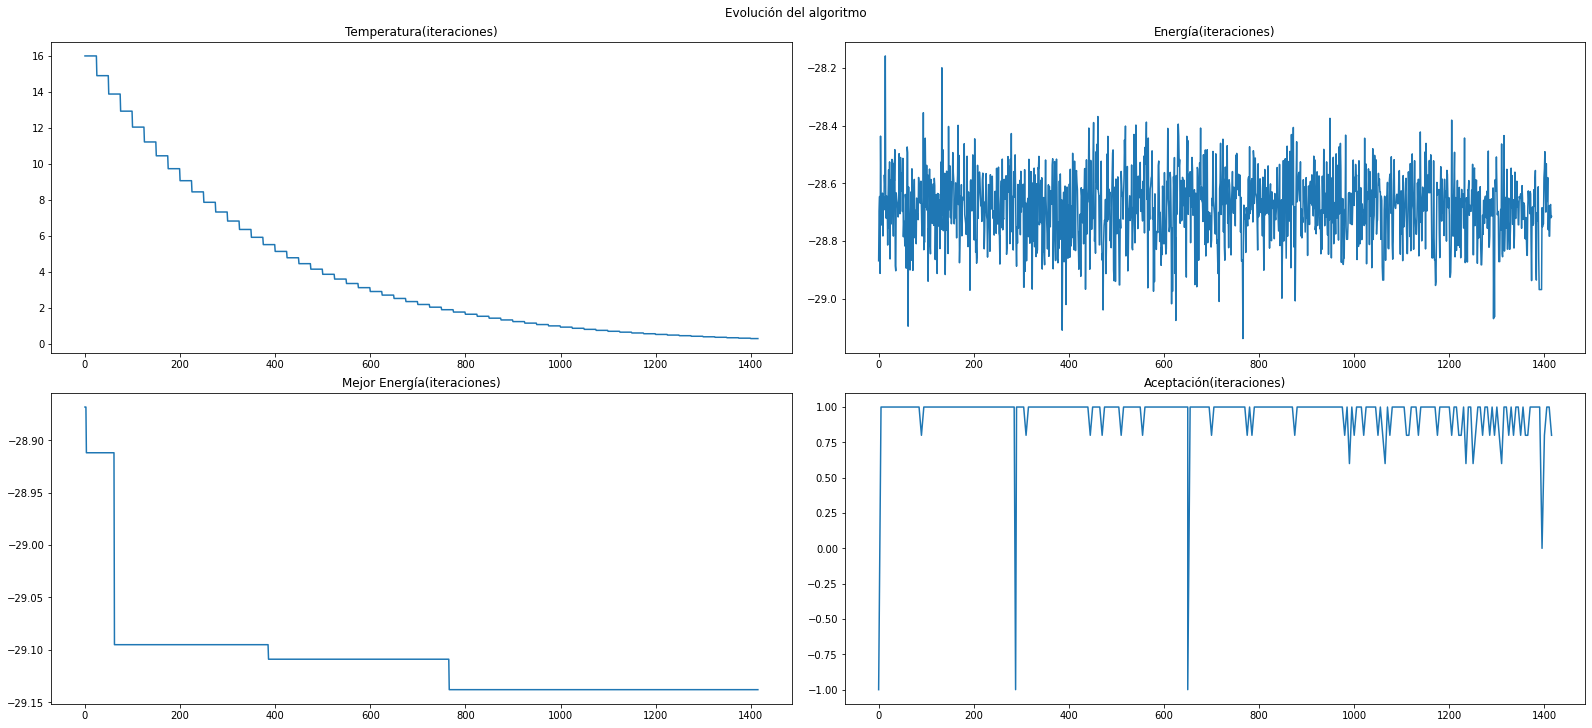

In [8]:
from casino import SimCasino, CasinoAnnealer
import pickle

with open('2021-12-03T22h30m23s.state', 'rb') as fh:
    ann = pickle.load(fh)
best_sol, best_cost = ann.resume_anneal(ann.epochs)
print(f'Mejores probabilidades: {list(best_sol)}')
print(f'Fichas medias: {-best_cost}')
print(f'Nº epochs {ann.epochs}')
ann.plot_evolution()

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.02512        -29.05     0.00%     0.00%    10:16:23    12:09:26

Mejores probabilidades: [0.0024163977794117958, 0.009854513439548228, 0.17652626705805785, 0.0058777893904716876, 0.07454808193975433, 0.49017240121885447, 0.24060454917390167]
Fichas medias: 29.236284444444546
Nº epochs 2292


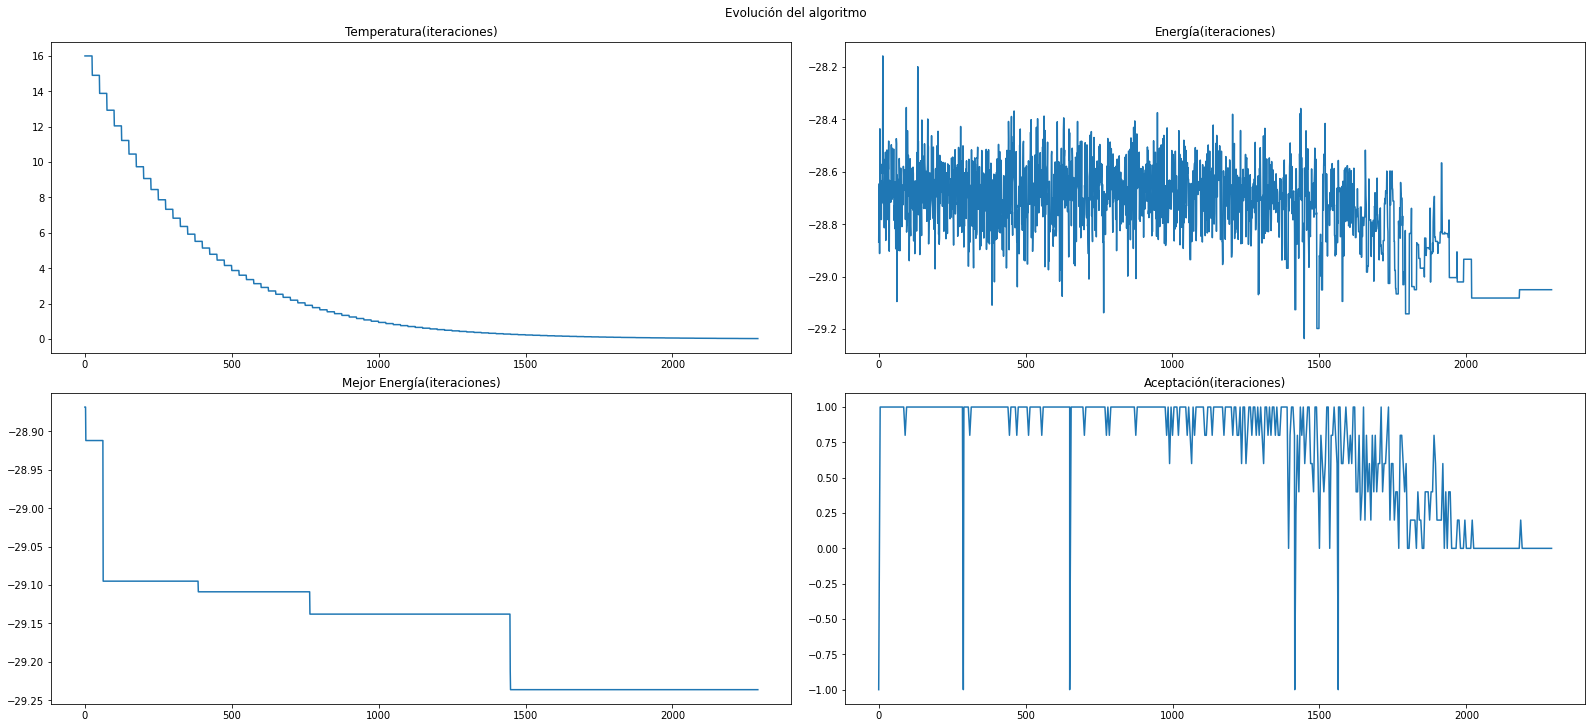

In [4]:
from casino import SimCasino, CasinoAnnealer
import pickle

with open('2021-12-05T09h46m25s.state', 'rb') as fh:
    ann = pickle.load(fh)
best_sol, best_cost = ann.resume_anneal(ann.epochs)
print(f'Mejores probabilidades: {list(best_sol)}')
print(f'Fichas medias: {-best_cost}')
print(f'Nº epochs {ann.epochs}')
ann.plot_evolution()

Apartado a)
	Proporción días bancarrota:  0.2701393333333243
Apartado b)
	Distribución de fichas al final día:


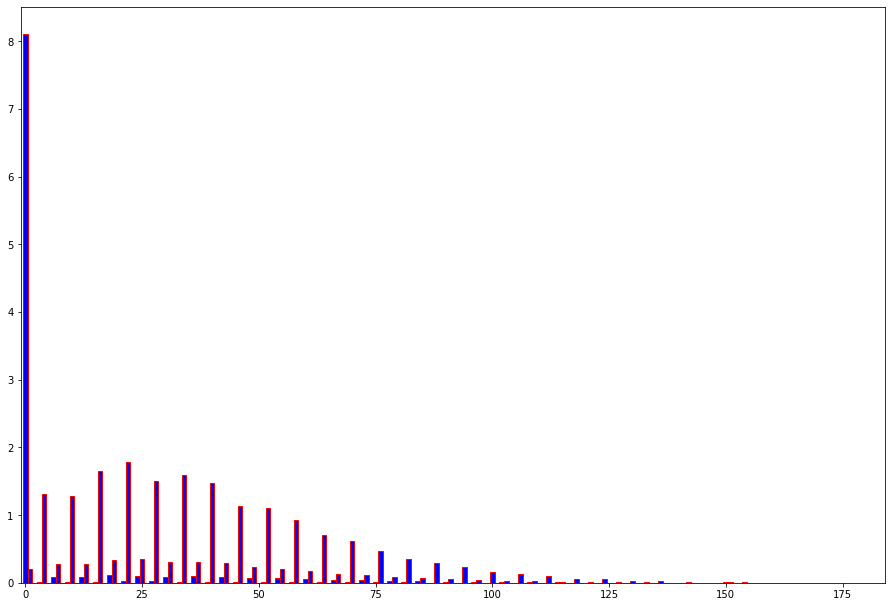

Apartado c)
	Partidas medias antes de bancarrota:  36.52346798973203
Número medio de fichas de cada noche: 28.707559333333336
Desviación estandar de fichas de la simulación: 29.28449351571955


In [5]:
# Comprobar que el resultado del recocido simulado es medianamente cierto
probs = [0.0024163977794117958, 0.009854513439548228, 0.17652626705805785, 0.0058777893904716876, 0.07454808193975433, 0.49017240121885447, 0.24060454917390167]
probs = np.array(probs)/sum(probs)
apartados_abc(50000, probs)

## Prueba de realizar un único tipo de apuesta

Apartado a)
	Proporción días bancarrota:  1.9999999999999998e-05
Apartado b)
	Distribución de fichas al final día:


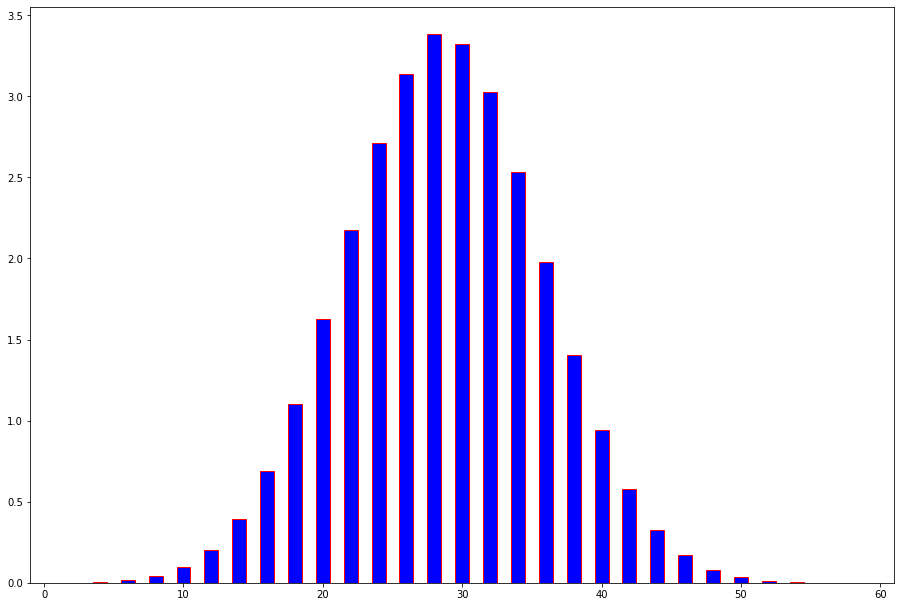

Apartado c)
	Partidas medias antes de bancarrota:  47.0
Número medio de fichas de cada noche: 28.661939999999998
Desviación estandar de fichas de la simulación: 7.18021866704773


In [3]:
probs = [1.0 ,0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
apartados_abc(10000, probs)

Apartado a)
	Proporción días bancarrota:  0.0016333333333333304
Apartado b)
	Distribución de fichas al final día:


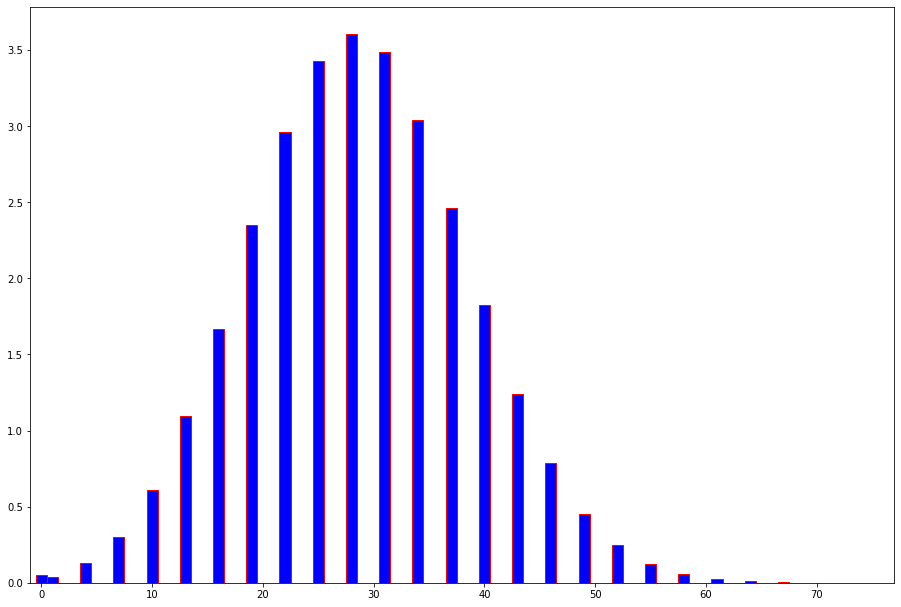

Apartado c)
	Partidas medias antes de bancarrota:  44.1441908713693
Número medio de fichas de cada noche: 28.626396666666665
Desviación estandar de fichas de la simulación: 10.080419251816974


In [4]:
probs = [0.0 ,1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
apartados_abc(10000, probs)

Apartado a)
	Proporción días bancarrota:  0.04383666666667032
Apartado b)
	Distribución de fichas al final día:


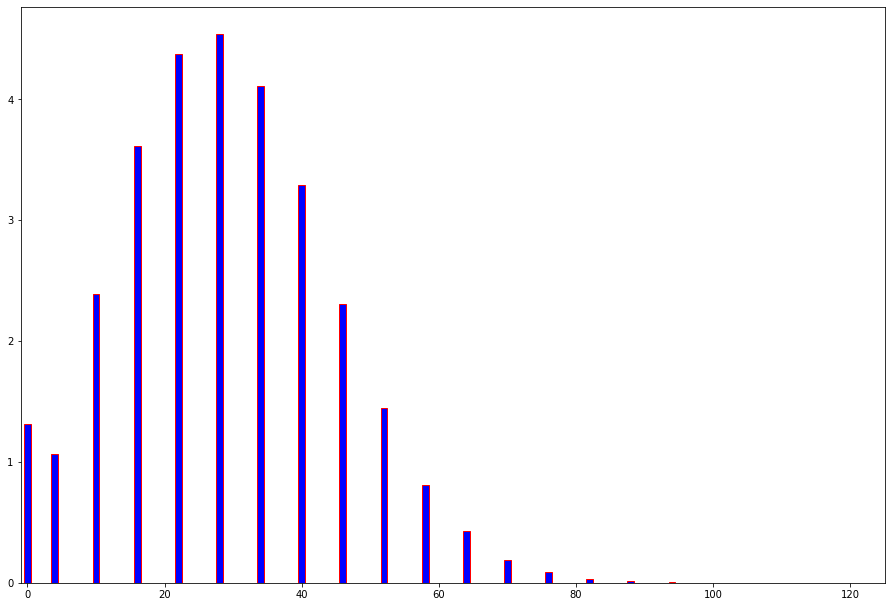

Apartado c)
	Partidas medias antes de bancarrota:  41.485986723456506
Número medio de fichas de cada noche: 28.667113333333333
Desviación estandar de fichas de la simulación: 15.817546339663503


In [5]:
probs = [0.0 ,0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
apartados_abc(10000, probs)

Apartado a)
	Proporción días bancarrota:  0.11582666666667162
Apartado b)
	Distribución de fichas al final día:


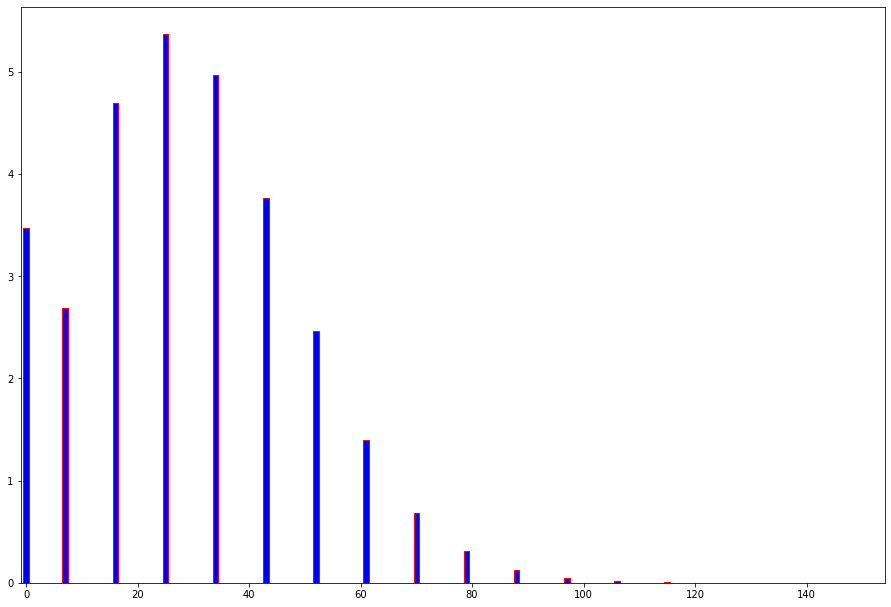

Apartado c)
	Partidas medias antes de bancarrota:  39.796559287465975
Número medio de fichas de cada noche: 28.737133333333333
Desviación estandar de fichas de la simulación: 19.81809851474732


In [6]:
probs = [0.0 ,0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
apartados_abc(10000, probs)

Apartado a)
	Proporción días bancarrota:  0.15566333333334256
Apartado b)
	Distribución de fichas al final día:


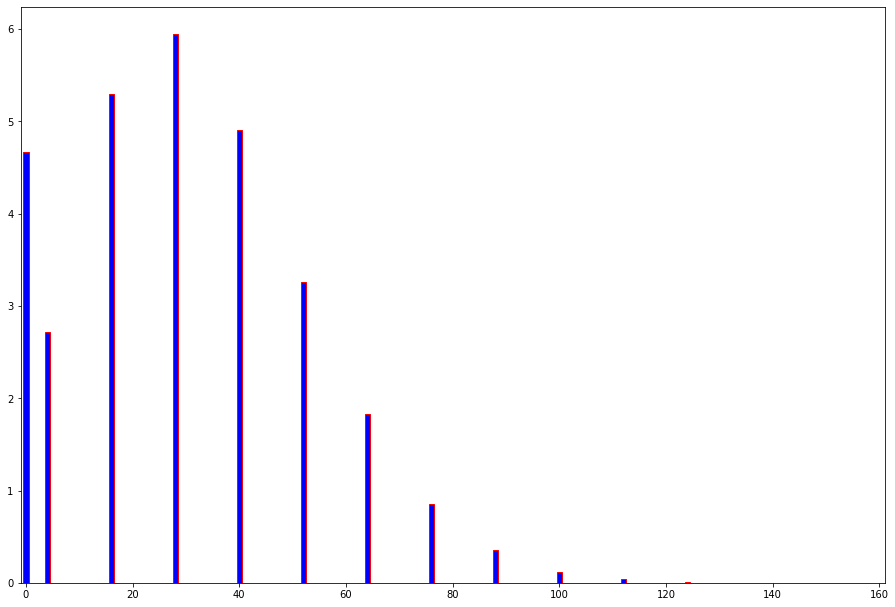

Apartado c)
	Partidas medias antes de bancarrota:  35.874974777167076
Número medio de fichas de cada noche: 28.62266666666667
Desviación estandar de fichas de la simulación: 22.918474092152024


In [7]:
probs = [0.0 ,0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
apartados_abc(10000, probs)

Apartado a)
	Proporción días bancarrota:  0.30791666666668127
Apartado b)
	Distribución de fichas al final día:


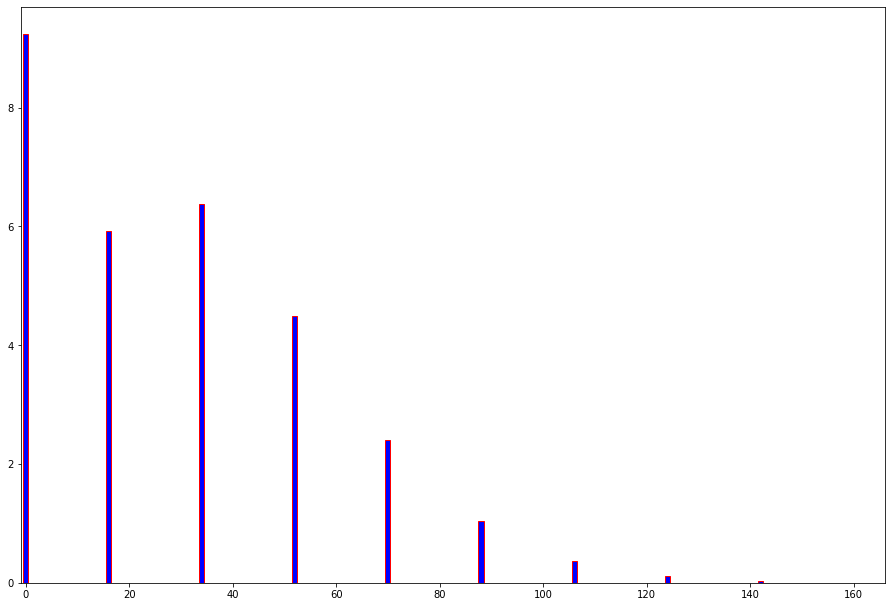

Apartado c)
	Partidas medias antes de bancarrota:  36.996187829074984
Número medio de fichas de cada noche: 28.812333333333328
Desviación estandar de fichas de la simulación: 28.03460179521179


In [8]:
probs = [0.0 ,0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
apartados_abc(10000, probs)

Apartado a)
	Proporción días bancarrota:  0.43766333333335133
Apartado b)
	Distribución de fichas al final día:


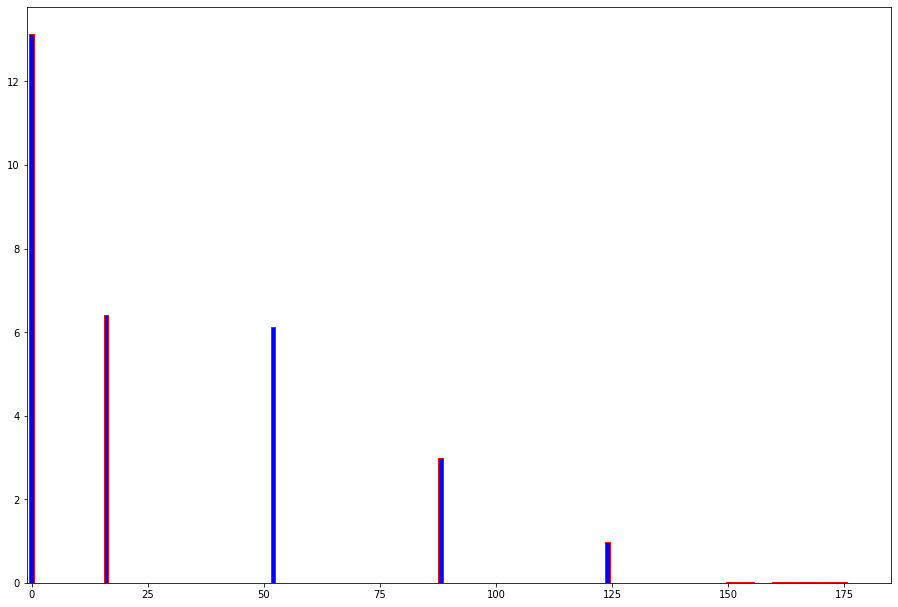

Apartado c)
	Partidas medias antes de bancarrota:  30.0
Número medio de fichas de cada noche: 28.873949999999997
Desviación estandar de fichas de la simulación: 37.7619451034691


In [9]:
probs = [0.0 ,0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
apartados_abc(10000, probs)